In [1]:
import pandas as pd
df = pd.read_csv('../results/2020-09-02-10-32-30.csv')
df.head(30)

,pipe,group,total_chars,total_clicks,total_time,total_bias,clicks_per_chars,bias_per_suggestion,ms_per_request
0,1_bias_topK_3,-1,3681,2788,96.620218,-85.4975,0.757403,-0.010222,34.655745
1,1_bias_topK_3,0,3681,3681,129.987255,0.0000,1.000000,0.000000,35.313028
2,1_bias_topK_3,1,3681,2788,95.133226,-77.9765,0.757403,-0.009323,34.122391
3,2_bias_topK_9,-1,3681,2850,102.058697,-580.3321,0.774246,-0.067875,35.810069
4,2_bias_topK_9,0,3681,3681,134.488419,0.0000,1.000000,0.000000,36.535838
5,2_bias_topK_9,1,3681,2829,100.174839,380.8078,0.768541,0.044870,35.409982
6,3_bias_topK_27,-1,3681,3001,110.046583,-1285.9898,0.815268,-0.142840,36.669971
7,3_bias_topK_27,0,3681,3681,139.853727,0.0000,1.000000,0.000000,37.993406
8,3_bias_topK_27,1,3681,2974,107.820722,1003.3034,0.807933,0.112453,36.254446
9,4_bias_topK_243,-1,3681,3133,124.660228,-2633.8611,0.851127,-0.280228,39.789412


In [7]:
df_vis = df[['pipe','group','clicks_per_chars','bias_per_suggestion','ms_per_request']]
df_vis['K'] = df['pipe'].apply(lambda s: int(s.split('_')[-1]))
df_vis = df_vis.sort_values(by=['K'])
df_vis.head(20)

/Users/matt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pipe,group,clicks_per_chars,bias_per_suggestion,ms_per_request,K
0,1_bias_topK_3,-1,0.757403,-0.010222,34.655745,3
1,1_bias_topK_3,0,1.000000,0.000000,35.313028,3
2,1_bias_topK_3,1,0.757403,-0.009323,34.122391,3
3,2_bias_topK_9,-1,0.774246,-0.067875,35.810069,9
4,2_bias_topK_9,0,1.000000,0.000000,36.535838,9
5,2_bias_topK_9,1,0.768541,0.044870,35.409982,9
7,3_bias_topK_27,0,1.000000,0.000000,37.993406,27
8,3_bias_topK_27,1,0.807933,0.112453,36.254446,27
6,3_bias_topK_27,-1,0.815268,-0.142840,36.669971,27
16,4_bias_topK_81,0,1.000000,0.000000,38.997226,81


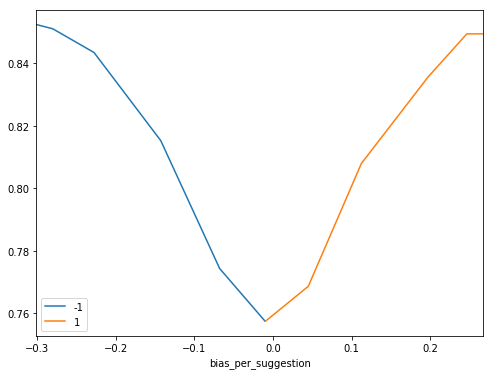

In [17]:
import matplotlib.pyplot as plt
#gf = 
#gf.plot(x='bias_per_suggestion',y='clicks_per_chars', ax=plt.gca())

fig, ax = plt.subplots(figsize=(8,6))
for label, df in df_vis[df_vis['group'].isin(['1','-1'])].groupby('group'):
    df.plot(x='bias_per_suggestion',y='clicks_per_chars', ax=ax, label=label)
plt.legend()